In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer - This is used to convert text data into numerical values
from sklearn.metrics.pairwise import cosine_similarity
import os


In [2]:
movies_data =pd.read_csv('movies.csv')
movies_data.head()


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [3]:
display (movies_data.shape)

(4803, 24)

In [4]:
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)


['genres', 'keywords', 'tagline', 'cast', 'director']


In [5]:
display (movies_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

None

In [6]:
display (movies_data.isna().sum())

,0
index,0
budget,0
genres,28
homepage,3091
id,0
keywords,412
original_language,0
original_title,0
overview,3
popularity,0


In [7]:
display (movies_data[selected_features].head())

,genres,keywords,tagline,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Enter the World of Pandora.,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"At the end of the world, the adventure begins.",Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A Plan No One Escapes,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Legend Ends,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"Lost in our world, found in another.",Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [8]:
display (movies_data[selected_features].isna().sum())

,0
genres,28
keywords,412
tagline,844
cast,43
director,30


In [9]:
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')
display (movies_data.head())


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [10]:

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']
display (combined_features)


,0
0,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime spy based on novel secr...
3,Action Crime Drama Thriller dc comics crime fi...
4,Action Adventure Science Fiction based on nove...
...,...
4798,Action Crime Thriller united states\u2013mexic...
4799,Comedy Romance A newlywed couple's honeymoon ...
4800,Comedy Drama Romance TV Movie date love at fir...
4801,A New Yorker in Shanghai Daniel Henney Eliza...


In [11]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
display (feature_vectors.shape)
print (feature_vectors)


(4803, 17318)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 124266 stored elements and shape (4803, 17318)>
  Coords	Values
  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.247137650

In [12]:
similarity = cosine_similarity(feature_vectors)
print  (similarity )


[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [13]:
display(similarity.shape)

(4803, 4803)

In [24]:
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name : Avatar


In [25]:

list_of_all_titles = movies_data['title'].tolist()
print(list_of_all_titles)


['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [26]:
len(list_of_all_titles)

4803

In [27]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)


['Avatar']


In [28]:
close_match = find_close_match[0]
print(close_match)


Avatar


In [29]:
index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)


0


In [30]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)


[(0, 1.0), (1, 0.07219486822992488), (2, 0.037732999577179294), (3, 0.012520204623868908), (4, 0.10702574467235304), (5, 0.07786899789424222), (6, 0.008237143013608844), (7, 0.03613473061484885), (8, 0.02960930964063025), (9, 0.026287167439951735), (10, 0.09261074046755373), (11, 0.012717759249124133), (12, 0.02721736008310012), (13, 0.029569752523347516), (14, 0.06915925473724743), (15, 0.019551594499309027), (16, 0.034263405780616416), (17, 0.02603656461429414), (18, 0.05714759266672412), (19, 0.0389505953521203), (20, 0.03971480215415496), (21, 0.01201480380565613), (22, 0.030438694261989592), (23, 0.045926535588179496), (24, 0.04623989017965258), (25, 0.04284926095950226), (26, 0.07010711150614288), (27, 0.037198076232328854), (28, 0.04083909796927843), (29, 0.03858648330156398), (30, 0.07893753610792024), (31, 0.06055522138055148), (32, 0.030362745635800832), (33, 0.03591021470068869), (34, 0.0), (35, 0.037696741034748446), (36, 0.04891087950911421), (37, 0.08575173998419439), (38

In [31]:
len(similarity_score)

4803

In [32]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)


[(0, 1.0), (3158, 0.2494676630753241), (2403, 0.24841462595906272), (94, 0.24505931974059822), (56, 0.20378069648285427), (47, 0.20115287461144912), (1053, 0.19702752258651424), (838, 0.18017023369312363), (3730, 0.1764624118531341), (4593, 0.17448845797415172), (239, 0.17441748680810656), (1531, 0.1682605817219649), (2696, 0.1650346025917652), (812, 0.16062301907491794), (643, 0.15644455512484967), (4401, 0.15468923545220403), (2198, 0.15217161971893786), (770, 0.1502572672775349), (1951, 0.14933372705282924), (2229, 0.14661801285492254), (1922, 0.14481974301913123), (206, 0.14226144606175548), (3208, 0.1401230206493547), (1759, 0.13899056016968867), (43, 0.1348209130228474), (1473, 0.13476547670086914), (278, 0.13291021545504), (158, 0.1325289213162767), (1650, 0.13024318650645417), (1275, 0.1260221630479115), (3439, 0.12480340331169379), (661, 0.12153002734138184), (3202, 0.12144749322246055), (4332, 0.12002556168548509), (3105, 0.11948466494212537), (775, 0.11847062758014923), (109

In [33]:
print('Movies suggested for you : \n')
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1


Movies suggested for you : 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies
11 . Gravity
12 . Moonraker
13 . Jason X
14 . Pocahontas
15 . Space Cowboys
16 . The Helix... Loaded
17 . Lockout
18 . Event Horizon
19 . Space Dogs
20 . Machete Kills
21 . Gettysburg
22 . Clash of the Titans
23 . Star Wars: Clone Wars: Volume 1
24 . The Right Stuff
25 . Terminator Salvation
26 . The Astronaut's Wife
27 . Planet of the Apes
28 . Star Trek
29 . Wing Commander


In [34]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1


 Enter your favourite movie name : Avatar
Movies suggested for you : 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies
11 . Gravity
12 . Moonraker
13 . Jason X
14 . Pocahontas
15 . Space Cowboys
16 . The Helix... Loaded
17 . Lockout
18 . Event Horizon
19 . Space Dogs
20 . Machete Kills
21 . Gettysburg
22 . Clash of the Titans
23 . Star Wars: Clone Wars: Volume 1
24 . The Right Stuff
25 . Terminator Salvation
26 . The Astronaut's Wife
27 . Planet of the Apes
28 . Star Trek
29 . Wing Commander


In [39]:
# Evaluation Metrics Functions

def precision_at_k(recommended, relevant, k):
    """
    Calculate precision@k.
    recommended: List of recommended movie IDs/titles.
    relevant: List or set of ground truth relevant movie IDs/titles.
    k: The number of top recommendations to consider.
    """
    recommended_at_k = recommended[:k]
    if k == 0:
        return 0.0
    num_relevant = len(set(recommended_at_k) & set(relevant))
    return num_relevant / k

def recall_at_k(recommended, relevant, k):
    """
    Calculate recall@k.
    recommended: List of recommended movie IDs/titles.
    relevant: List or set of ground truth relevant movie IDs/titles.
    k: The number of top recommendations to consider.
    """
    recommended_at_k = recommended[:k]
    if not relevant:
        return 0.0
    num_relevant = len(set(recommended_at_k) & set(relevant))
    return num_relevant / len(relevant)

def f1_score_at_k(recommended, relevant, k):
    """
    Calculate F1-score@k using precision and recall.
    """
    prec = precision_at_k(recommended, relevant, k)
    rec = recall_at_k(recommended, relevant, k)
    if prec + rec == 0:
        return 0.0
    return 2 * (prec * rec) / (prec + rec)

def mean_reciprocal_rank(recommendations, ground_truth):
    """
    Calculate Mean Reciprocal Rank (MRR) for a batch of recommendations.

    recommendations: List of lists, where each inner list contains recommended movies for a user.
    ground_truth: List of sets (or lists) where each element is the set of relevant movies for that user.
    """
    rr_total = 0.0
    for rec, rel in zip(recommendations, ground_truth):
        found = False
        for i, item in enumerate(rec, start=1):
            if item in rel:
                rr_total += 1 / i
                found = True
                break
        if not found:
            rr_total += 0  # no relevant item found in the recommendation list
    return rr_total / len(recommendations)

# Example usage of evaluation metrics
recommended_movies = ["Movie A", "Movie B", "Movie C", "Movie D", "Movie E"]
relevant_movies = ["Movie B", "Movie E"]

k = 3
precision_val = precision_at_k(recommended_movies, relevant_movies, k)
recall_val = recall_at_k(recommended_movies, relevant_movies, k)
f1_val = f1_score_at_k(recommended_movies, relevant_movies, k)
mrr_val = mean_reciprocal_rank(user_recommendations, user_ground_truth)
# Print out the values
print(f"Precision@{k}: {precision_val:.2f}")
print(f"Recall@{k}: {recall_val:.2f}")
print(f"F1 Score@{k}: {f1_val:.2f}")
print(f"Mean Reciprocal Rank (MRR): {mrr_val:.2f}")

# For MRR example, consider recommendations from two users:
user_recommendations = [
    ["Movie A", "Movie B", "Movie C"],
    ["Movie D", "Movie E", "Movie F"]
]
user_ground_truth = [
    {"Movie B", "Movie X"},
    {"Movie F", "Movie Y"}
]
print("Mean Reciprocal Rank (MRR): {:.2f}".format(mean_reciprocal_rank(user_recommendations, user_ground_truth)))


Precision@3: 0.33
Recall@3: 0.50
F1 Score@3: 0.40
Mean Reciprocal Rank (MRR): 0.42
Mean Reciprocal Rank (MRR): 0.42


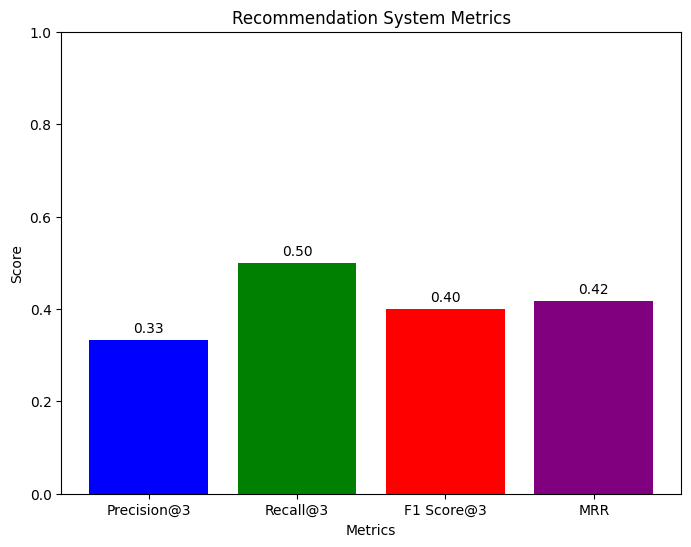

In [40]:
import matplotlib.pyplot as plt

metrics = {
    f'Precision@{k}': precision_val,
    f'Recall@{k}': recall_val,
    f'F1 Score@{k}': f1_val,
    'MRR': mrr_val
}

# Convert dictionary to two lists for plotting
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(metric_names, metric_values, color=['blue', 'green', 'red', 'purple'])

# Add text labels above the bars to show exact values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.01,
        f"{height:.2f}",
        ha='center',
        va='bottom'
    )

# Customize plot labels and limits
plt.ylim(0, 1)  # All metrics are between 0 and 1
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Recommendation System Metrics')

# Show the plot
plt.show()


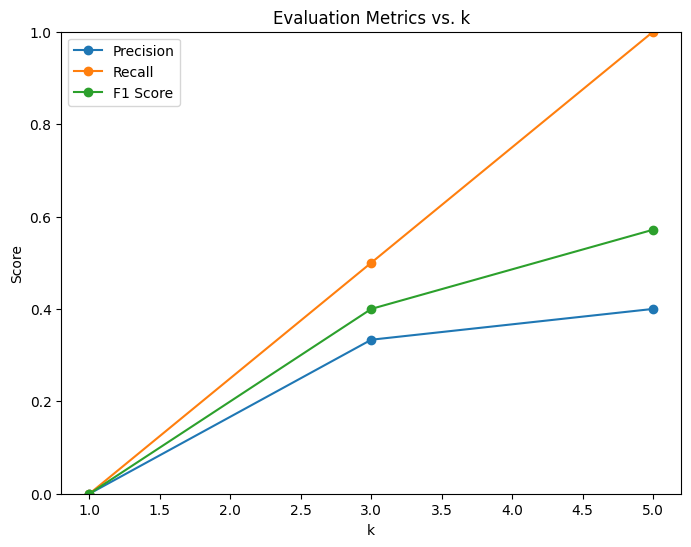

In [41]:
k_values = [1, 3, 5]
precisions = [precision_at_k(recommended_movies, relevant_movies, k_val) for k_val in k_values]
recalls = [recall_at_k(recommended_movies, relevant_movies, k_val) for k_val in k_values]
f1_scores = [f1_score_at_k(recommended_movies, relevant_movies, k_val) for k_val in k_values]

plt.figure(figsize=(8, 6))
plt.plot(k_values, precisions, marker='o', label='Precision')
plt.plot(k_values, recalls, marker='o', label='Recall')
plt.plot(k_values, f1_scores, marker='o', label='F1 Score')
plt.title("Evaluation Metrics vs. k")
plt.xlabel("k")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [36]:
def collect_user_feedback(recommendations):
    """
    Collect feedback for a list of recommended movies.
    Returns a dictionary with movie titles as keys and user ratings as values.
    """
    feedback = {}
    print("Please rate the following movies on a scale from 1 (dislike) to 5 (like):")
    for movie in recommendations:
        while True:
            try:
                rating = int(input(f"Rating for '{movie}': "))
                if rating < 1 or rating > 5:
                    print("Please enter a rating between 1 and 5.")
                else:
                    feedback[movie] = rating
                    break
            except ValueError:
                print("Invalid input. Please enter an integer value.")
    return feedback

# Example usage of feedback collection
user_feedback = collect_user_feedback(recommended_movies)
print("Collected User Feedback:")
for movie, rating in user_feedback.items():
    print(f"{movie}: {rating}")


Please rate the following movies on a scale from 1 (dislike) to 5 (like):
Rating for 'Movie A': 5
Rating for 'Movie B': 3
Rating for 'Movie C': 4
Rating for 'Movie D': 3
Rating for 'Movie E': 2
Collected User Feedback:
Movie A: 5
Movie B: 3
Movie C: 4
Movie D: 3
Movie E: 2
